<a href="https://colab.research.google.com/github/sremirhn/DSPG-deneme-proje/blob/main/Binalar%C4%B1n_Enerji_Verimlili%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ENB2012_data.csv")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


*   X1 Relative Compactness
*   X2 Surface Area
*   X3 Wall Area
*   X4 Roof Area
*   X5 Overall Height
*   X6 Orientation
*   X7 Glazing Area
*   X8 Glazing Area Distribution
*   y1 Heating Load
*   y2 Cooling Load

In [6]:
df.columns = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height",
                "orientation", "glazing_area", "glazing_area_distribution", "heating_load", "cooling_load"]

In [7]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

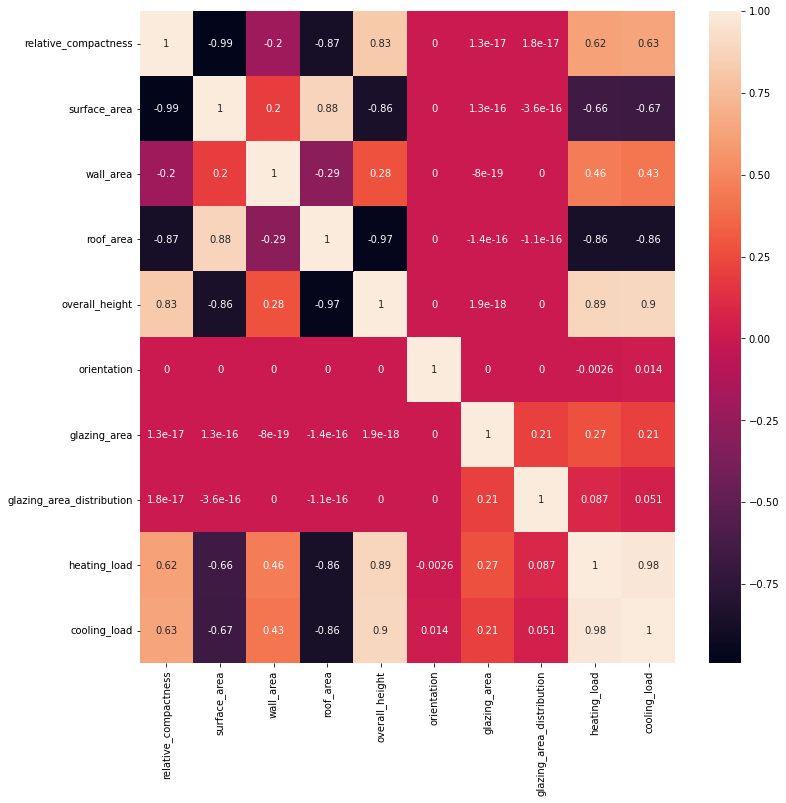

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

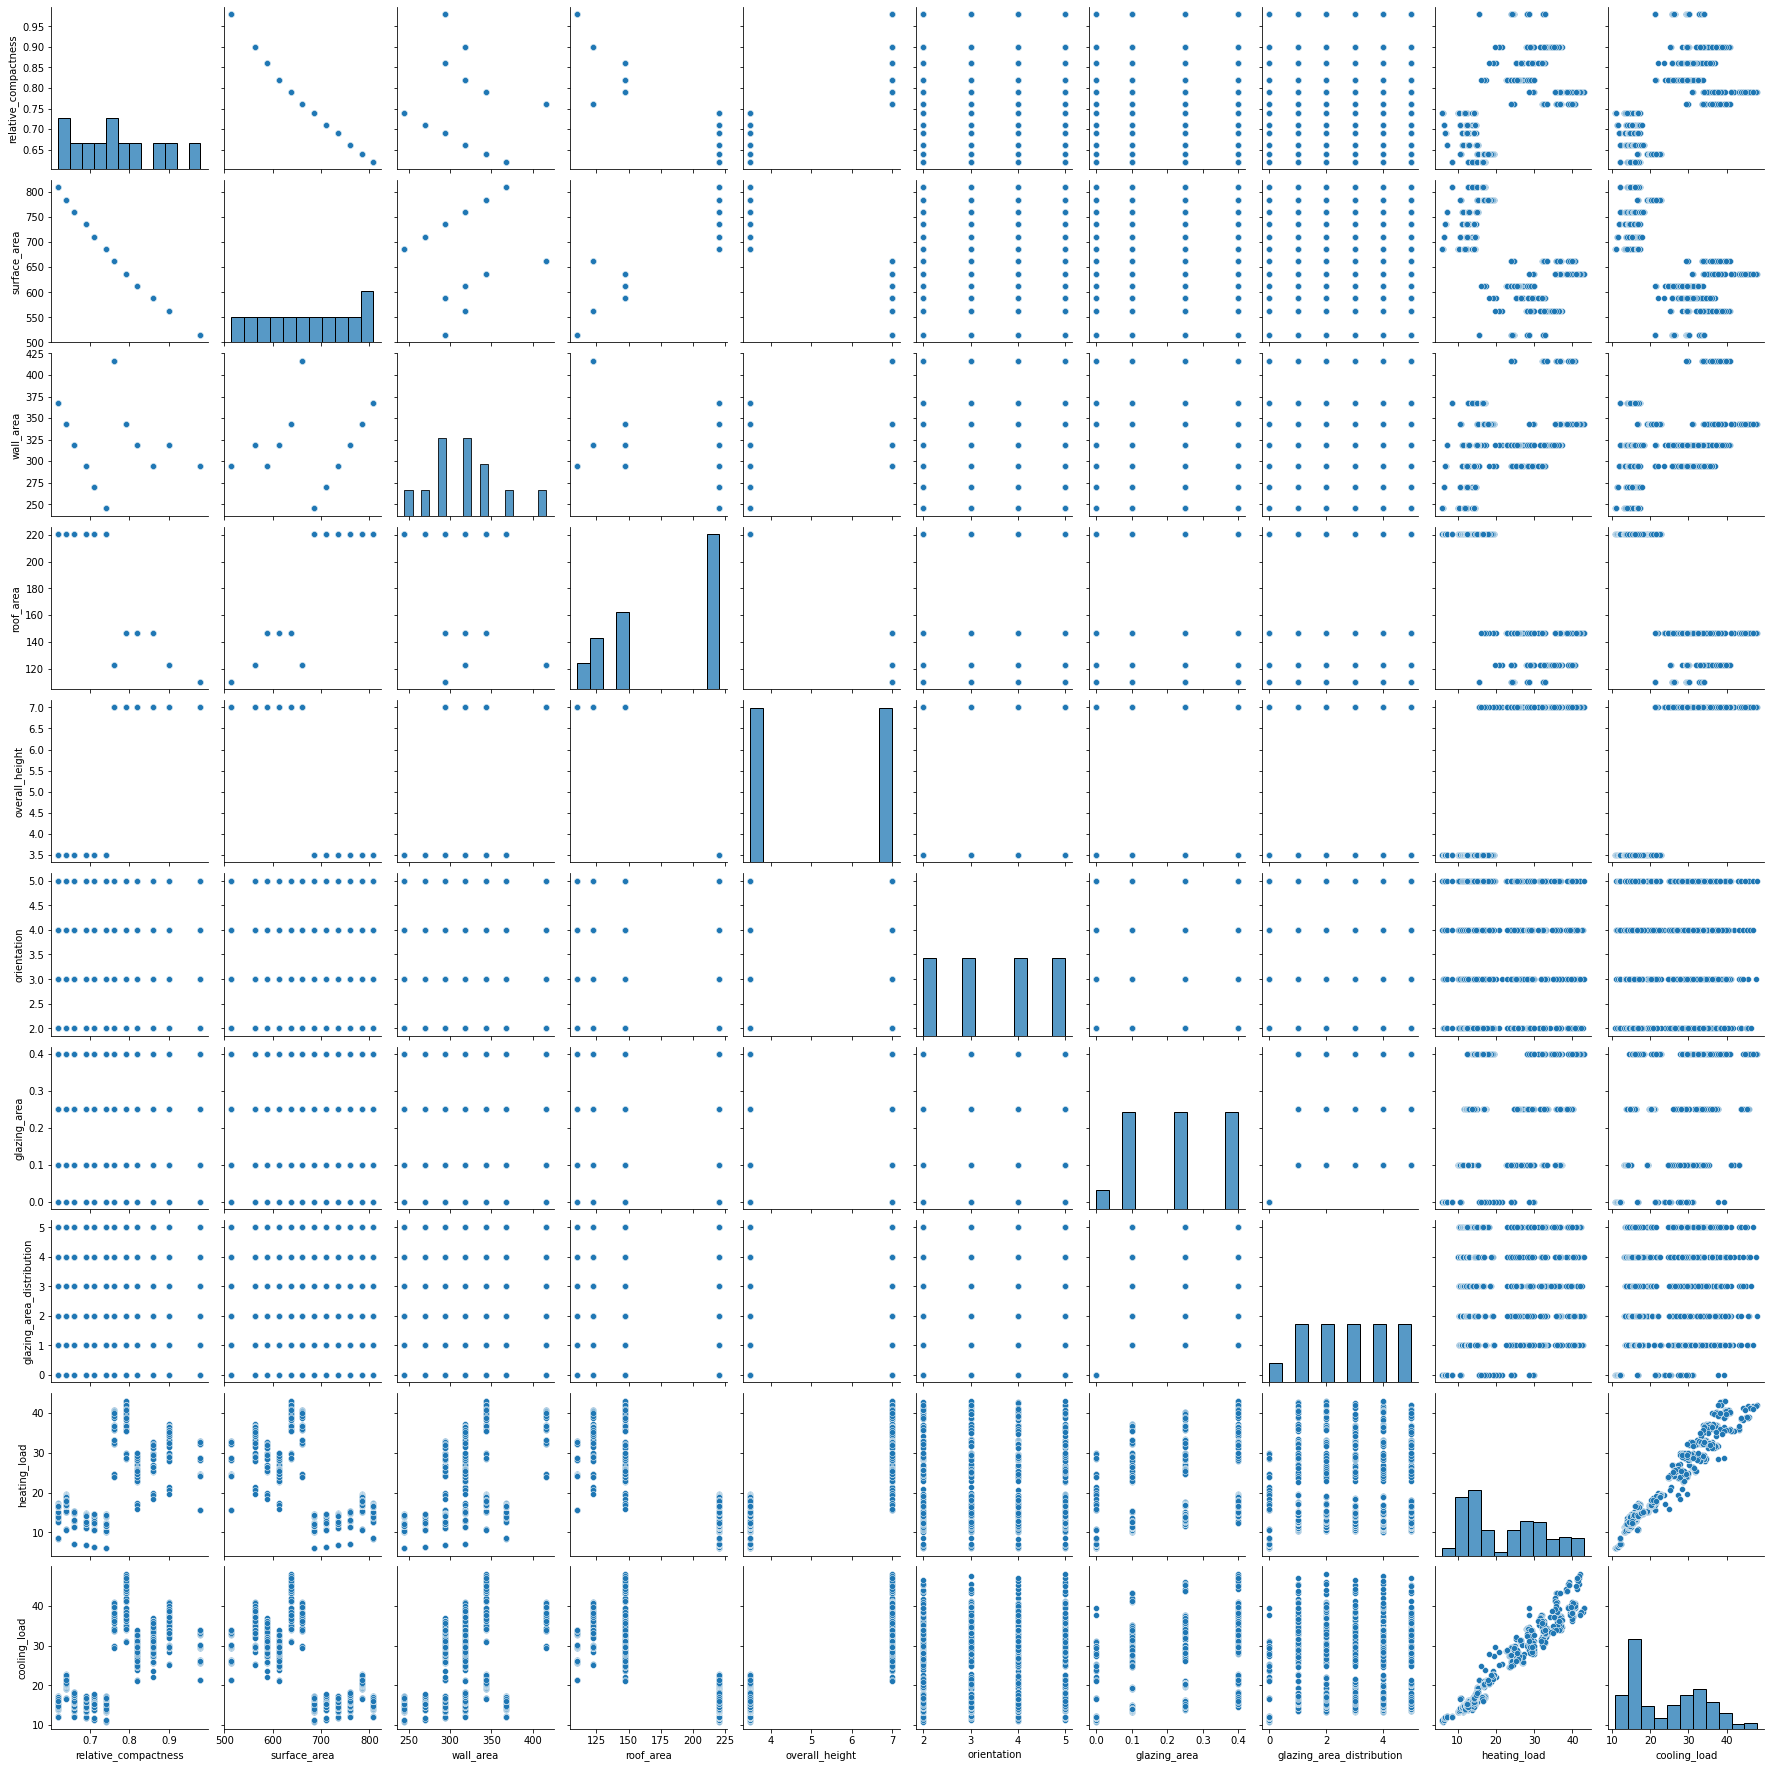

In [22]:
sns.pairplot(df)

In [27]:
from sklearn.preprocessing import StandardScaler
stn = StandardScaler(copy=False)

X = df.drop(['heating_load','cooling_load'], axis=1)
X = stn.fit_transform(X)
y = df[['heating_load','cooling_load']]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

*Random Forest Regressor*

In [48]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [31]:
rf=RandomForestRegressor(random_state=42)

In [32]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
print("Model Score:",rf.score(X_train,y_train)*100)
print("R2 cv score:",cross_val_score(rf,X_train,y_train,cv=10,scoring="r2").mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Model Score: 99.69559171534688
R2 cv score: 97.61277653629845


Model Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
rf_params= {"max_depth": list(range(1,10)),
             "max_features": [2,3,4,5,6],
            "n_estimators": [100,200,300,400,500,800] }

In [39]:
gr=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1)

In [40]:
gr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [43]:
gr.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 100}

In [44]:
rft=RandomForestRegressor(max_depth=7,max_features=5,n_estimators=100).fit(X_train,y_train)

In [45]:
print("Model Score:",rft.score(X_train,y_train)*100)
print("R2 cv Score:",cross_val_score(rft,X_train,y_train,cv=10,scoring="r2").mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Model Score: 99.05250727797018
R2 cv Score: 97.88023679832722


In [46]:
rf_y_pred=rft.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
np.sqrt(mean_absolute_error(y_test,rf_y_pred))

0.8590155112952272

In [47]:
r2_score(y_test,rf_y_pred)*100

98.26343168406176

*Decision Tree Regressor*

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dt = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [55]:
print("Model Score:",dt.score(X_train,y_train)*100)
print("R2 cv score:",cross_val_score(dt,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 100.0
R2 cv score: 96.34652021081926


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


*Model Tuning*

In [56]:
param = {'max_depth' : [7,8,9],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [6,7,8]}

In [57]:
grdt=GridSearchCV(dt,param,cv=10,n_jobs=-1)

In [58]:
grdt.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [16, 17, 18]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [59]:
grdt.best_params_

{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 17}

In [60]:
dt_tuned=DecisionTreeRegressor(max_depth=7,min_samples_leaf=6,min_impurity_split=17).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


In [63]:
dt_y_pred=dt_tuned.predict(X_test)

In [66]:
print("Model Score:",dt_tuned.score(X_train,y_train)*100)
print("R2 cv score:",cross_val_score(dt_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100)
print("Test score:",r2_score(y_test,dt_y_pred)*100)
print("test rmse:",np.sqrt(mean_absolute_error(y_test,dt_y_pred)))

Model Score: 91.65484266384888
R2 cv score: 89.38351301169214
Test score: 90.1669979512495
test rmse: 1.5587141432483986


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in versio